In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


file_path = 'Employee.csv'
employee_data = pd.read_csv(file_path)


label_encoders = {
    "Education": LabelEncoder(),
    "City": LabelEncoder(),
    "Gender": LabelEncoder(),
    "EverBenched": LabelEncoder()
}

for col, le in label_encoders.items():
    employee_data[col] = le.fit_transform(employee_data[col])

display(employee_data)

X = employee_data.drop(columns=['LeaveOrNot'])
y = employee_data['LeaveOrNot']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

print("Правильність на train фреймі: {:.3f}".format(knn_model.score(X_train, y_train)))
print("Правильність на test фреймі: {:.3f}".format(knn_model.score(X_test, y_test)))


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


Accuracy: 0.8216332378223495
Confusion Matrix:
 [[845  75]
 [174 302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       920
           1       0.80      0.63      0.71       476

    accuracy                           0.82      1396
   macro avg       0.82      0.78      0.79      1396
weighted avg       0.82      0.82      0.82      1396

Правильність на train фреймі: 0.855
Правильність на test фреймі: 0.822


In [2]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)
all_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    all_scores.append(scores.mean())

max_k = k_range[np.argmax(all_scores)]
print(f"max k: {max_k}")


max k: 4


In [8]:

def zero_r(y):
    mode = y.value_counts().idxmax()
    return [mode] * len(y)

zero_r_pred = zero_r(y_test)

zero_r_accuracy = accuracy_score(y_test, zero_r_pred)

{
    "ZeroR": zero_r_accuracy
}

{'ZeroR': 0.6590257879656161}

In [ ]:
def one_r_simple(data, target_column):
    best_attribute = None
    min_errors = float('inf')
    best_rule = {}

    for column in data.columns:
        if column == target_column:
            continue

        rule = {}
        for value in data[column].unique():
            most_common = data[data[column] == value][target_column].mode()[0]
            rule[value] = most_common

        errors = sum(data[target_column] != data[column].map(rule))

        if errors < min_errors:
            min_errors = errors
            best_attribute = column
            best_rule = rule

    return best_attribute, best_rule

best_attr, rule = one_r_simple(employee_data, target_column="LeaveOrNot")
print(f"Найкращий атрибут: {best_attr}")
print(f"Правило: {rule}")


predictions = employee_data["JoiningYear"].map(rule)
accuracy = (predictions == employee_data["LeaveOrNot"]).mean()
print(f"Точність правила: {accuracy:.2f}")


Найкращий атрибут: JoiningYear
Правило: {2017: 0, 2013: 0, 2014: 0, 2016: 0, 2015: 0, 2012: 0, 2018: 1}
Точність правила: 0.73


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)

feature_importances = random_forest.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

display(importance_df)

,Feature,Importance
1,JoiningYear,0.311256
4,Age,0.181750
2,City,0.116109
3,PaymentTier,0.102485
0,Education,0.098347
7,ExperienceInCurrentDomain,0.088828
5,Gender,0.082831
6,EverBenched,0.018394


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print("Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Classification Report:\n", report_log_reg)


print("Правильність на train фреймі: {:.3f}".format(log_reg_model.score(X_train, y_train)))
print("Правильність на test фреймі: {:.3f}".format(log_reg_model.score(X_test, y_test)))


Accuracy: 0.7177650429799427
Confusion Matrix:
 [[812 108]
 [286 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       920
           1       0.64      0.40      0.49       476

    accuracy                           0.72      1396
   macro avg       0.69      0.64      0.65      1396
weighted avg       0.70      0.72      0.70      1396

Правильність на train фреймі: 0.708
Правильність на test фреймі: 0.718


In [ ]:
results = []
for penalty in ['l1', 'l2', 'elasticnet', 'none']:
    if penalty == 'elasticnet':
        # Elastic net requires 'saga' solver
        model = LogisticRegression(penalty=penalty, solver='saga', l1_ratio=0.5, max_iter=1000, random_state=42)
    elif penalty == 'none':
        # No regularization
        model = LogisticRegression(penalty=penalty, solver='lbfgs', max_iter=1000, random_state=42)
    else:
        model = LogisticRegression(penalty=penalty, solver='liblinear', max_iter=1000, random_state=42)
    
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'penalty': penalty,
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': conf_matrix
        })
    except Exception as e:
        results.append({
            'penalty': penalty,
            'error': str(e)
        })

# Return the best result
best_result = max(results, key=lambda x: x.get('accuracy', 0))
best_result

{'penalty': 'l1',
 'accuracy': 0.7184813753581661,
 'classification_report': {'0': {'precision': 0.7397634212920837,
   'recall': 0.883695652173913,
   'f1-score': 0.8053491827637445,
   'support': 920.0},
  '1': {'precision': 0.6397306397306397,
   'recall': 0.39915966386554624,
   'f1-score': 0.49159120310478654,
   'support': 476.0},
  'accuracy': 0.7184813753581661,
  'macro avg': {'precision': 0.6897470305113618,
   'recall': 0.6414276580197296,
   'f1-score': 0.6484701929342656,
   'support': 1396.0},
  'weighted avg': {'precision': 0.7056548224215626,
   'recall': 0.7184813753581661,
   'f1-score': 0.698365802880031,
   'support': 1396.0}},
 'confusion_matrix': array([[813, 107],
        [286, 190]], dtype=int64)}

In [ ]:
X_significant = employee_data[['JoiningYear', 'City', 'Age']]
y_significant = employee_data['LeaveOrNot']

X_train_significant, X_test_significant, y_train_significant, y_test_significant = train_test_split(
    X_significant, y_significant, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_significant = scaler.fit_transform(X_train_significant)
X_test_significant = scaler.transform(X_test_significant)

model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_significant, y_train_significant)

y_pred_significant = model.predict(X_test_significant)
accuracy_significant = accuracy_score(y_test_significant, y_pred_significant)
conf_matrix_significant = confusion_matrix(y_test_significant, y_pred_significant)
report_significant = classification_report(y_test_significant, y_pred_significant)

# Результати
print("Accuracy (Significant Features):", accuracy_significant)
print("Confusion Matrix:\n", conf_matrix_significant)
print("Classification Report:\n", report_significant)


Accuracy (Significant Features): 0.6626074498567335
Confusion Matrix:
 [[849  71]
 [400  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78       920
           1       0.52      0.16      0.24       476

    accuracy                           0.66      1396
   macro avg       0.60      0.54      0.51      1396
weighted avg       0.62      0.66      0.60      1396



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

linear_svc_model = LinearSVC(max_iter=10000, random_state=42)

linear_svc_model.fit(X_train, y_train)

y_pred_linear_svc = linear_svc_model.predict(X_test)

accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
conf_matrix_linear_svc = confusion_matrix(y_test, y_pred_linear_svc)
report_linear_svc = classification_report(y_test, y_pred_linear_svc)

print("Accuracy:", accuracy_linear_svc)
print("Confusion Matrix:\n", conf_matrix_linear_svc)
print("Classification Report:\n", report_linear_svc)


Accuracy: 0.7184813753581661
Confusion Matrix:
 [[816 104]
 [289 187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       920
           1       0.64      0.39      0.49       476

    accuracy                           0.72      1396
   macro avg       0.69      0.64      0.65      1396
weighted avg       0.71      0.72      0.70      1396



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)


print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", report_dt)


Accuracy: 0.8330945558739254
Confusion Matrix:
 [[828  92]
 [141 335]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       920
           1       0.78      0.70      0.74       476

    accuracy                           0.83      1396
   macro avg       0.82      0.80      0.81      1396
weighted avg       0.83      0.83      0.83      1396



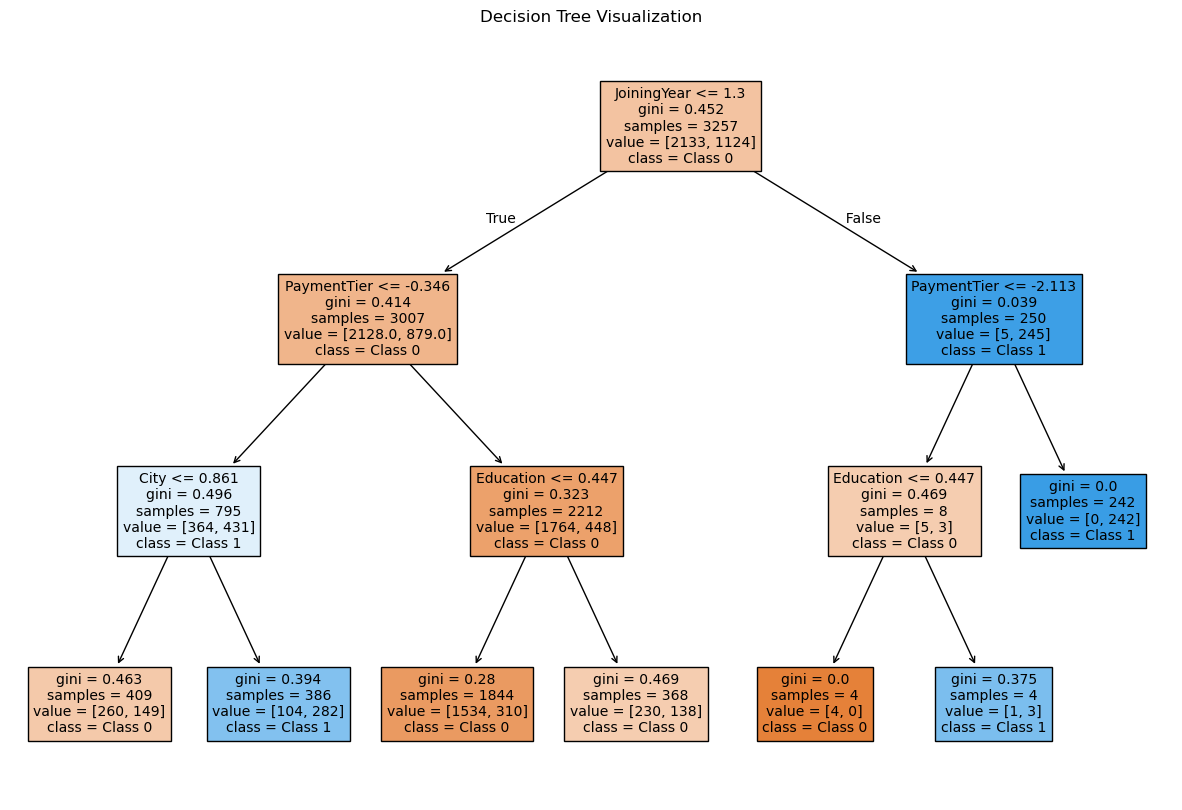

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Ініціалізація моделі дерева рішень
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Задайте max_depth для зручної візуалізації

# Навчання моделі
dt_model.fit(X_train, y_train)

# Візуалізація дерева рішень
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

accuracy_nb, conf_matrix_nb, report_nb
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", report_nb)


Accuracy: 0.6797994269340975
Confusion Matrix:
 [[731 189]
 [258 218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       920
           1       0.54      0.46      0.49       476

    accuracy                           0.68      1396
   macro avg       0.64      0.63      0.63      1396
weighted avg       0.67      0.68      0.67      1396

